#**Measuring MultiCollinearity**

In Topic M1.3.12 we have shown how VIF can be used to measure multicollinearity in a feature datasets. VIF is calculated by regressing an independent variable against all the other variables and using the following formula:

>>$X_1=\alpha + X_2+...+X_n$

We then get the $R^2$ from each variables regression model and then calculate the VIF using the following equation:

>>$ V.I.F. = 1 / (1 - R^2). $

If your VIF factor is >10 then you really need to  drop variables from your model, but if it is between 5-10 then you need to consider it.

Lets look at the Boston housing data fro Scikit Learn.

In [1]:
from sklearn.datasets import fetch_california_housing

import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline
boston = fetch_california_housing()
#print(boston.DESCR)
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target
print(bos.describe())
print(bos.columns)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

So we have 8 independent variables and we will now examine the correlation matrix. From this matrix you will already see correlations >0.7. This tells us that we are likely to have issues.

<Axes: >

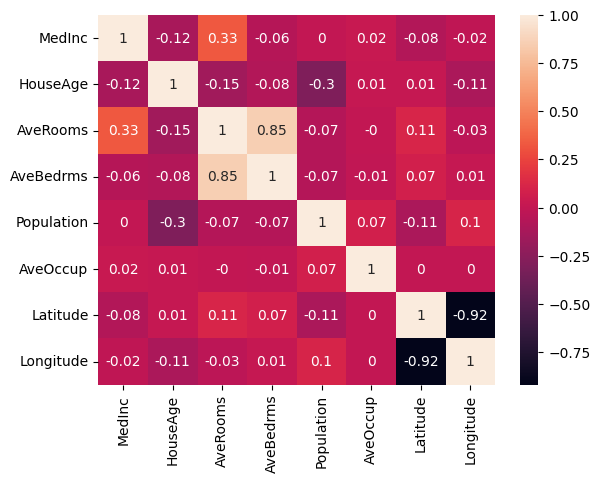

In [2]:
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

When you run your model in python it gives 2 small warnings at the bottom of the summary. Don't worry about [1] but
\[2\] tells us that the inverted $X^tX$ matrix is close to non-invertible. This is telling us that there is possible multcollinearity in our data. The condition number is the ratio of the largest eigenvalue to the smallest eigenvalue in the $X^TX$(design matrix) matrix. Now this eigenvalue ratio may also be high becuase of scaling differences in our design matrix. So we will have to calculate the VIF's for each variable before we can decide what to do next.

In [3]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X=bos[boston.feature_names]

y=bos['PRICE']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)


X = sm.add_constant(X_train_1)

model = sm.OLS(np.log(y_train_1),X)
results = model.fit()
y_pred=results.predict(X)

rms = np.sqrt(mean_squared_error(y_train_1, y_pred))
#

X_test = sm.add_constant(X_test_1)
y_test_pred=results.predict(X_test)
rms_test = np.sqrt(mean_squared_error(y_test_1, y_test_pred))

print("training root mean Square error is: ",rms)
print("test root mean Square error is: ",rms_test)
print(results.summary())

training root mean Square error is:  1.720612964649749
test root mean Square error is:  1.7466607747794005
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     3301.
Date:                Wed, 10 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:15:28   Log-Likelihood:                -6194.3
No. Observations:               16512   AIC:                         1.241e+04
Df Residuals:                   16503   BIC:                         1.248e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

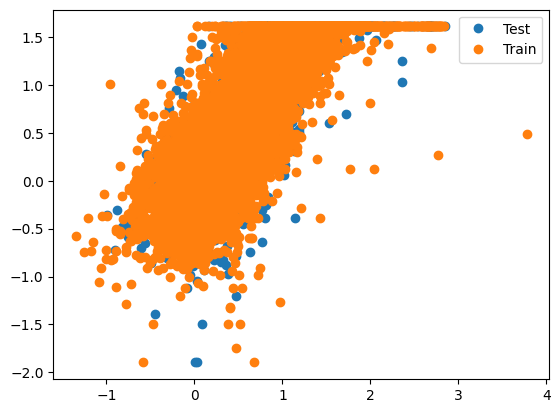

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(y_test_pred, np.log(y_test_1), 'o', label="Test")
ax.plot(y_pred, np.log(y_train_1), 'o', label="Train")


ax.legend(loc="best");

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant
import pandas as pd



X = add_constant(X_train_1)

vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]
print(vif[1:])

print("VIF > 5:",X.columns[np.where(np.asarray(vif[1:])>5)])


[np.float64(2.479844981344676), np.float64(1.2398333503745431), np.float64(8.476766035189726), np.float64(7.1734021281745415), np.float64(1.1360684046309832), np.float64(1.009904943171181), np.float64(9.234092288802751), np.float64(8.92620422589664)]
VIF > 5: Index(['HouseAge', 'AveRooms', 'AveOccup', 'Latitude'], dtype='object')


Now the code above is used to find the variables that are affected by multicollinearity. They are 'HouseAge', 'AveRooms', 'AveOccup', and 'Latitude' variables. Now if we remove these variable you will see the condition number is lower but still high, however the VIFs are all fine. This high condition number is purely a scaling issue as the Multicollinearity is now gone. The literature tells that a condition number above 20 is high. However, this can be caused by variables comming from differing scales as well as multicollinearity.

I would now like you to experiment with the variables in this model and see what happens when you reduce them further. What happens your predictions? Are you concerned about the low values of the Y variable? And can you explain why we have put a log value around Y?